<a href="https://colab.research.google.com/github/ploybongkot/DWDM21/blob/main/testtwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np

In [24]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
/content/efficientnet_keras_transfer_learning


In [25]:
df = pd.read_csv (r'/content/drive/MyDrive/data/Part/ttrealpart.csv')
df

,Unnamed: 0,Path_Name,id,Part
0,0,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
1,1,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
2,2,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
3,3,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
4,4,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
...,...,...,...,...
195911,195911,/content/drive/My Drive/car/car052/p14/left-11...,car052,p14
195912,195912,/content/drive/My Drive/car/car052/p14/left-11...,car052,p14
195913,195913,/content/drive/My Drive/car/car052/p14/left-11...,car052,p14
195914,195914,/content/drive/My Drive/car/car052/p14/left-11...,car052,p14


In [26]:
import sys
sys.path.append('/content/drive/My Drive/Model/Train_id2_id6_id8_id10_Test_id12_600.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [27]:
#load model 
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/Model/Train_id2_id6_id8_id10_Test_id12_600.h5')
height = width = model.input_shape[1]

In [28]:
DATA_PATH = "/content/drive/My Drive/id"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/My Drive/id/train
/content/drive/My Drive/id/test


In [29]:
train = df[df['Unnamed: 0'].between(0,190079)]
test = df[df['Unnamed: 0'].between(190080,243527)]

In [30]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_Name',
        y_col = 'Part',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')
        

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 190080 validated image filenames belonging to 15 classes.
{0: 'p01', 1: 'p02', 2: 'p03', 3: 'p04', 4: 'p05', 5: 'p06', 6: 'p07', 7: 'p08', 8: 'p09', 9: 'p10', 10: 'p11', 11: 'p12', 12: 'p13', 13: 'p14', 14: 'p15'}


In [31]:
test = df[df['Unnamed: 0'].between(190080,243527)]
test

,Unnamed: 0,Path_Name,id,Part
190080,190080,/content/drive/My Drive/car/car001/p08/left-00...,car001,p08
190081,190081,/content/drive/My Drive/car/car001/p08/left-01...,car001,p08
190082,190082,/content/drive/My Drive/car/car001/p08/left-00...,car001,p08
190083,190083,/content/drive/My Drive/car/car001/p08/left-00...,car001,p08
190084,190084,/content/drive/My Drive/car/car001/p08/left-00...,car001,p08
...,...,...,...,...
195911,195911,/content/drive/My Drive/car/car052/p14/left-11...,car052,p14
195912,195912,/content/drive/My Drive/car/car052/p14/left-11...,car052,p14
195913,195913,/content/drive/My Drive/car/car052/p14/left-11...,car052,p14
195914,195914,/content/drive/My Drive/car/car052/p14/left-11...,car052,p14


In [32]:
act = test['Part'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [33]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path): #สร้างฟังก์ชัน 
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตาม พารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img) # model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [34]:
predict_image(path[0])[0]

1/1 [==============================] - 2s 2s/step


7.923256e-17

In [35]:
import numpy as np

In [36]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 88ms/step


In [37]:
pred_list

['p08',
 'p08',
 'p05',
 'p05',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p05',
 'p08',
 'p08',
 'p05',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p05',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p15',
 'p15',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p05',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p08',
 'p08',
 'p08',
 'p14',
 'p08',
 'p08',
 'p14',
 'p08',
 'p08',
 'p14',
 'p14',
 'p14',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p05',
 'p05',
 'p08',
 'p15',
 'p15',
 'p05',
 'p15',
 'p15',
 'p08',
 'p05',
 'p08',
 'p05',
 'p14',
 'p14',
 'p14',
 'p14',
 'p15',
 'p14',
 'p14',
 'p14',
 'p15',
 'p15',
 'p15',
 'p08',
 'p14',
 'p08',
 'p08',
 'p08',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p15',
 'p14',
 'p15',
 'p14',
 'p14',
 'p15',
 'p14',
 'p14',
 'p14',
 'p14',
 'p14',
 'p14',
 'p14',
 'p14',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',
 'p08',


In [38]:
pred = np.array(pred_list)
act = np.array(act)

In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 8.156271418779987%
              precision    recall  f1-score   support

         p01       0.00      0.00      0.00       303
         p02       0.23      0.03      0.05       679
         p03       0.00      0.00      0.00       421
         p04       0.00      0.00      0.00       370
         p05       0.12      0.03      0.04       592
         p06       0.00      0.00      0.00       637
         p07       0.00      0.00      0.00       216
         p08       0.08      0.75      0.15       374
         p09       0.00      0.00      0.00       500
         p10       0.00      0.00      0.00       513
         p11       0.00      0.00      0.00       309
         p12       0.00      0.00      0.00       296
         p13       0.05      0.02      0.03       236
         p14       0.17      0.40      0.24       390
         p15       0.00      0.00      0.00         0

    accuracy                           0.08      5836
   macro avg       0.04      0.08      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

Text(0.5, 66.5, 'Predicted label')

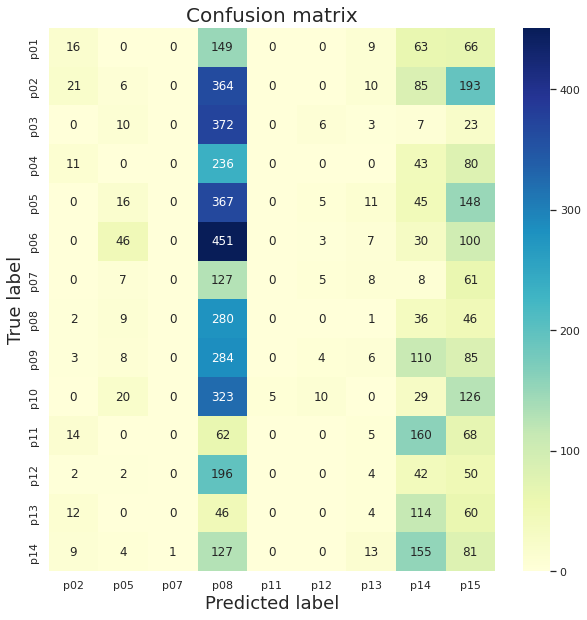

In [40]:
#create CF 
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)